# Libraries and Global Variables

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import f_regression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import re
import pickle
import statsmodels.api as sm
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score, roc_curve

In [0]:
csv_path = 'Class Notebooks/datasets/predictive_maintenance_timestamp.csv'
pickle_path = 'Predictive maintenance pickles'

In [3]:
df = pd.read_csv(csv_path)
df.head()

,timestamp,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,ttf
0,2019-01-01 00:00:00,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,2019-01-01 00:00:30,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,2019-01-01 00:01:00,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,2019-01-01 00:01:30,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,2019-01-01 00:02:00,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


# Preprocessing

In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df.cycle.value_counts()

16     100
40     100
1      100
17     100
2      100
      ... 
357      1
356      1
355      1
354      1
351      1
Name: cycle, Length: 362, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20631 entries, 2019-01-01 00:00:00 to 2019-01-08 03:55:00
Data columns (total 27 columns):
id          20631 non-null int64
cycle       20631 non-null int64
setting1    20631 non-null float64
setting2    20631 non-null float64
setting3    20631 non-null float64
s1          20631 non-null float64
s2          20631 non-null float64
s3          20631 non-null float64
s4          20631 non-null float64
s5          20631 non-null float64
s6          20631 non-null float64
s7          20631 non-null float64
s8          20631 non-null float64
s9          20631 non-null float64
s10         20631 non-null float64
s11         20631 non-null float64
s12         20631 non-null float64
s13         20631 non-null float64
s14         20631 non-null float64
s15         20631 non-null float64
s16         20631 non-null float64
s17         20631 non-null int64
s18         20631 non-null int64
s19         20631 non-null float64
s20         20631 non-nu

In [6]:
df['id'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [7]:
df.groupby('id').size()

id
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Length: 100, dtype: int64

In [8]:
start_time = df[df.cycle == 1].index
start_time

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:36:00',
               '2019-01-01 03:59:30', '2019-01-01 05:29:00',
               '2019-01-01 07:03:30', '2019-01-01 09:18:00',
               '2019-01-01 10:52:00', '2019-01-01 13:01:30',
               '2019-01-01 14:16:30', '2019-01-01 15:57:00',
               '2019-01-01 17:48:00', '2019-01-01 19:48:00',
               '2019-01-01 21:13:00', '2019-01-01 22:34:30',
               '2019-01-02 00:04:30', '2019-01-02 01:48:00',
               '2019-01-02 03:32:30', '2019-01-02 05:50:30',
               '2019-01-02 07:28:00', '2019-01-02 08:47:00',
               '2019-01-02 10:44:00', '2019-01-02 12:21:30',
               '2019-01-02 14:02:30', '2019-01-02 15:26:30',
               '2019-01-02 16:40:00', '2019-01-02 18:35:00',
               '2019-01-02 20:14:30', '2019-01-02 21:32:30',
               '2019-01-02 22:55:00', '2019-01-03 00:16:30',
               '2019-01-03 01:53:30', '2019-01-03 03:50:30',
               '2019-01-

In [9]:
end_time = df[df.ttf == 0].index
end_time

DatetimeIndex(['2019-01-01 01:35:30', '2019-01-01 03:59:00',
               '2019-01-01 05:28:30', '2019-01-01 07:03:00',
               '2019-01-01 09:17:30', '2019-01-01 10:51:30',
               '2019-01-01 13:01:00', '2019-01-01 14:16:00',
               '2019-01-01 15:56:30', '2019-01-01 17:47:30',
               '2019-01-01 19:47:30', '2019-01-01 21:12:30',
               '2019-01-01 22:34:00', '2019-01-02 00:04:00',
               '2019-01-02 01:47:30', '2019-01-02 03:32:00',
               '2019-01-02 05:50:00', '2019-01-02 07:27:30',
               '2019-01-02 08:46:30', '2019-01-02 10:43:30',
               '2019-01-02 12:21:00', '2019-01-02 14:02:00',
               '2019-01-02 15:26:00', '2019-01-02 16:39:30',
               '2019-01-02 18:34:30', '2019-01-02 20:14:00',
               '2019-01-02 21:32:00', '2019-01-02 22:54:30',
               '2019-01-03 00:16:00', '2019-01-03 01:53:00',
               '2019-01-03 03:50:00', '2019-01-03 05:25:30',
               '2019-01-

In [10]:
time_delta = end_time - start_time
time_delta

TimedeltaIndex(['01:35:30', '02:23:00', '01:29:00', '01:34:00', '02:14:00',
                '01:33:30', '02:09:00', '01:14:30', '01:40:00', '01:50:30',
                '01:59:30', '01:24:30', '01:21:00', '01:29:30', '01:43:00',
                '01:44:00', '02:17:30', '01:37:00', '01:18:30', '01:56:30',
                '01:37:00', '01:40:30', '01:23:30', '01:13:00', '01:54:30',
                '01:39:00', '01:17:30', '01:22:00', '01:21:00', '01:36:30',
                '01:56:30', '01:35:00', '01:39:30', '01:37:00', '01:30:00',
                '01:18:30', '01:24:30', '01:36:30', '01:03:30', '01:33:30',
                '01:47:30', '01:37:30', '01:43:00', '01:35:30', '01:18:30',
                '02:07:30', '01:46:30', '01:55:00', '01:47:00', '01:38:30',
                '01:46:00', '01:46:00', '01:37:00', '02:08:00', '01:36:00',
                '02:17:00', '01:08:00', '01:13:00', '01:55:00', '01:25:30',
                '01:32:00', '01:29:30', '01:26:30', '02:21:00', '01:16:00',
            

In [11]:
time_delta = time_delta.to_frame()
time_delta

,timestamp
timestamp,
01:35:30,01:35:30
02:23:00,02:23:00
01:29:00,01:29:00
01:34:00,01:34:00
02:14:00,02:14:00
...,...
02:47:30,02:47:30
01:40:30,01:40:30
01:17:30,01:17:30


In [12]:
time_delta['timestamp'] = pd.to_timedelta(time_delta['timestamp'])
time_delta['timestamp']

timestamp
01:35:30   01:35:30
02:23:00   02:23:00
01:29:00   01:29:00
01:34:00   01:34:00
02:14:00   02:14:00
             ...   
02:47:30   02:47:30
01:40:30   01:40:30
01:17:30   01:17:30
01:32:00   01:32:00
01:39:30   01:39:30
Name: timestamp, Length: 100, dtype: timedelta64[ns]

In [13]:
time_delta['timestamp'].mean()

Timedelta('0 days 01:42:39.300000')

# EDA

In [14]:
df.corr()['ttf'].to_frame()

,ttf
id,7.875253e-02
cycle,-7.362406e-01
setting1,-3.198458e-03
setting2,-1.947628e-03
setting3,NaN
s1,1.535649e-14
s2,-6.064840e-01
s3,-5.845204e-01
s4,-6.789482e-01
s5,1.561885e-14


# Regressors Vs TTF

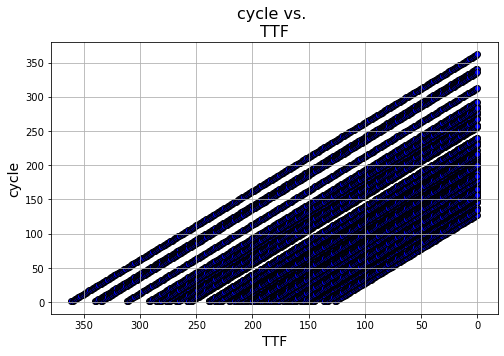

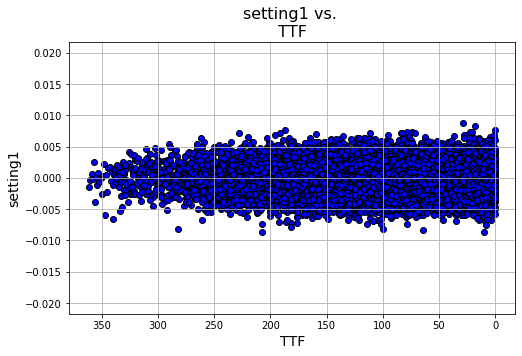

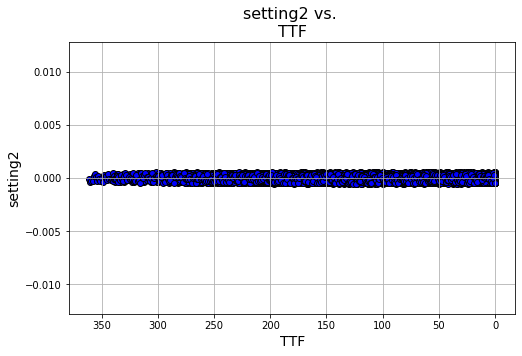

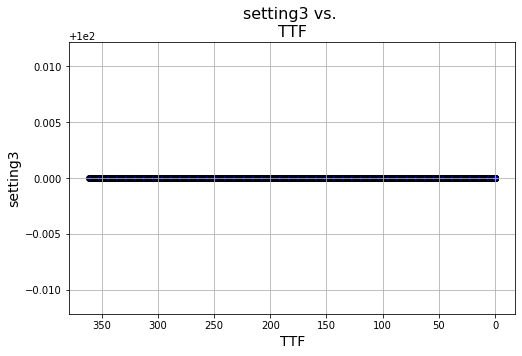

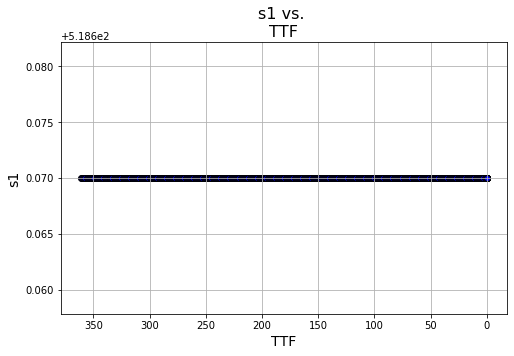

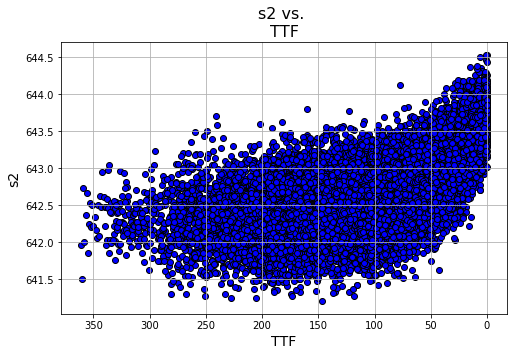

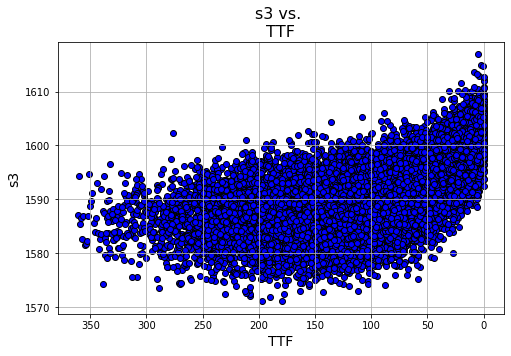

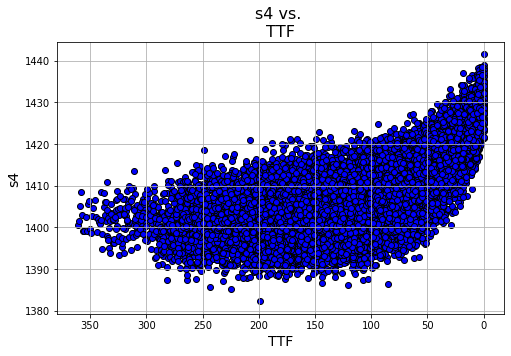

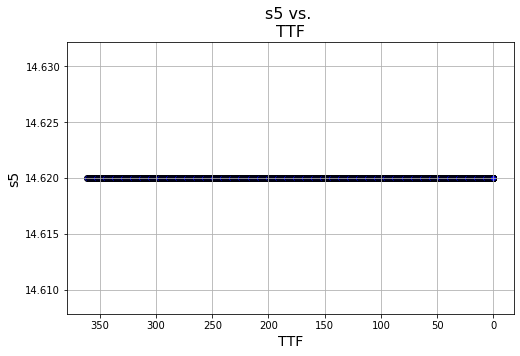

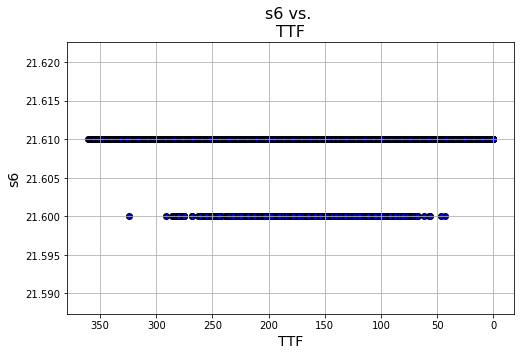

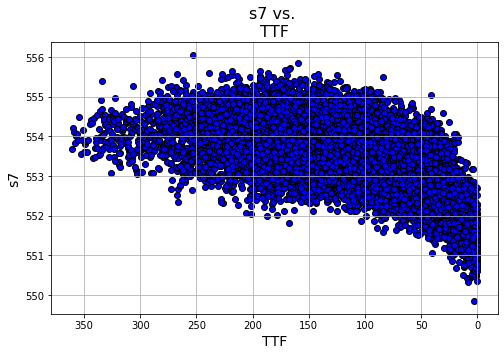

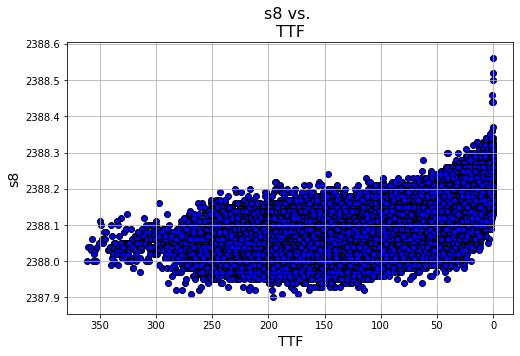

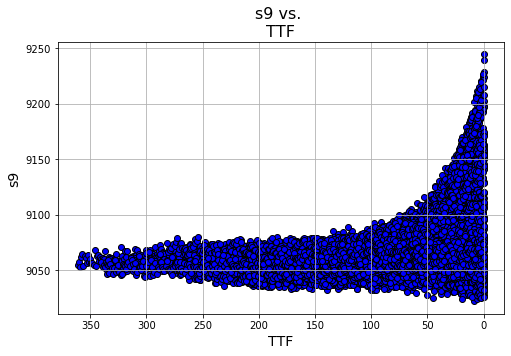

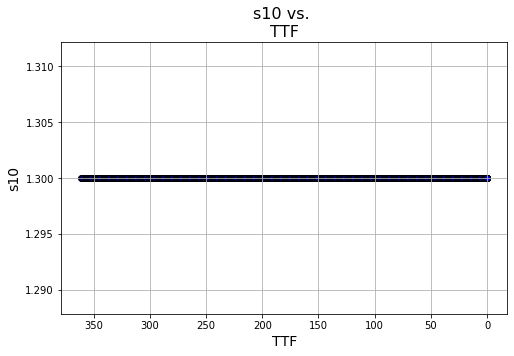

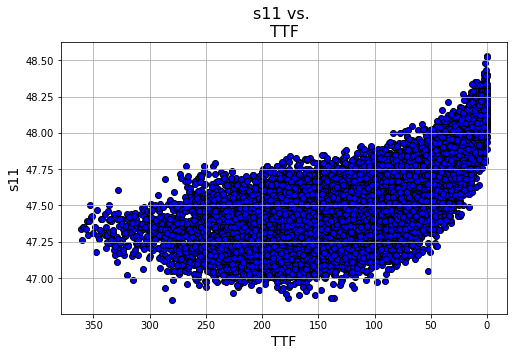

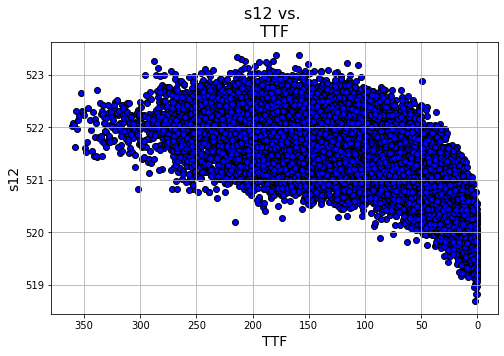

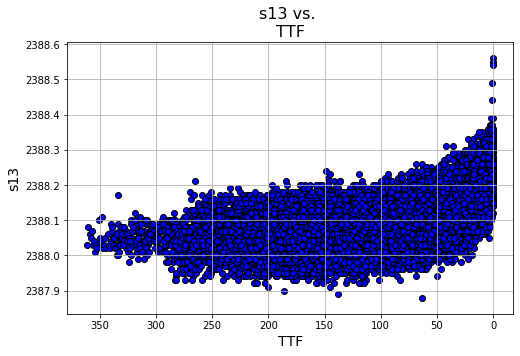

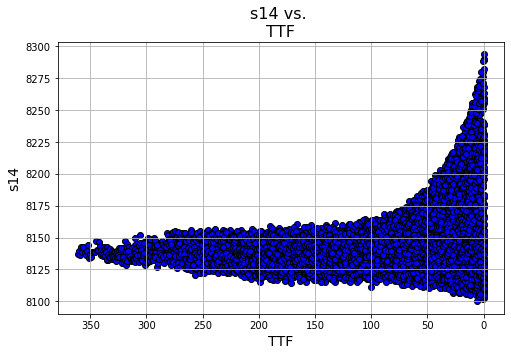

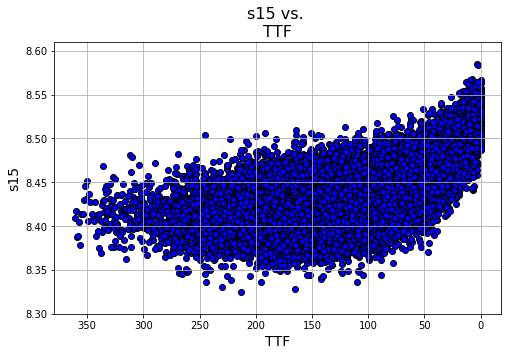

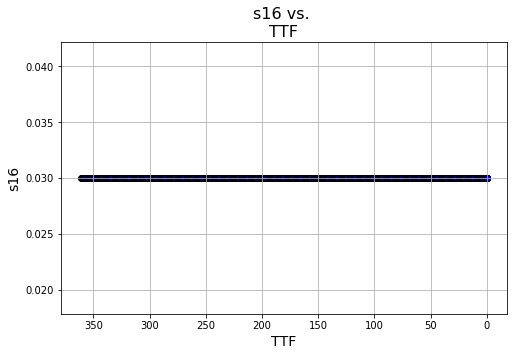

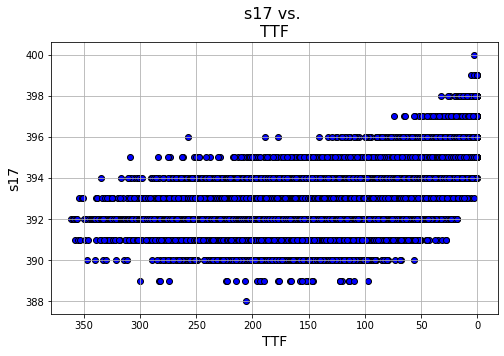

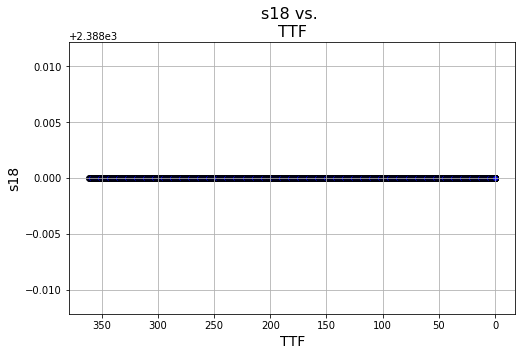

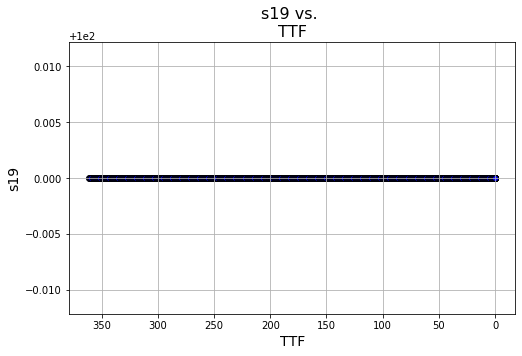

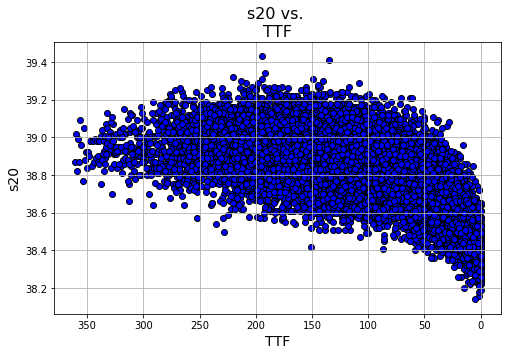

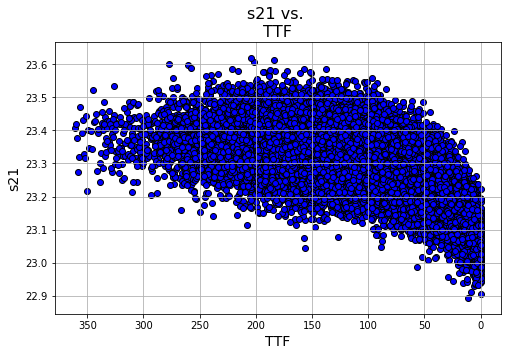

In [15]:
for c in df.columns[1:-1]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nTTF".format(c),fontsize=16)
    plt.scatter(x=df['ttf'], y = df[c],color='blue',edgecolor='k')
    plt.grid(True)
    plt.gca().invert_xaxis()
    plt.xlabel('TTF',fontsize=14)
    plt.ylabel(c,fontsize=14)
    plt.show()

In [16]:
df.loc[:,'s1': 's21'].describe()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.3,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,0.00,0.500053,6.131150,9.000605,1.776400e-15,0.001389,0.885092,0.070985,22.082880,0.0,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.3,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.3,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.3,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.3,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.3,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [17]:
df.loc[:,'s1': 's21'].describe().loc['std'].sort_values(ascending=False).round(4)

s9     22.0829
s14    19.0762
s4      9.0006
s3      6.1311
s17     1.5488
s7      0.8851
s12     0.7376
s2      0.5001
s11     0.2671
s20     0.1807
s21     0.1083
s13     0.0719
s8      0.0710
s15     0.0375
s6      0.0014
s5      0.0000
s16     0.0000
s10     0.0000
s18     0.0000
s19     0.0000
s1      0.0000
Name: std, dtype: float64

In [18]:
df.drop(['s5', 's6','s16', 's10', 's18', 's19', 's1'], 1, inplace=True)
df.head()

,id,cycle,setting1,setting2,setting3,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,ttf
timestamp,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,1,1,-0.0007,-0.0004,100.0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
2019-01-01 00:00:30,1,2,0.0019,-0.0003,100.0,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2019-01-01 00:01:00,1,3,-0.0043,0.0003,100.0,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
2019-01-01 00:01:30,1,4,0.0007,0.0000,100.0,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
2019-01-01 00:02:00,1,5,-0.0019,-0.0002,100.0,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


In [19]:
df.drop(['id','setting1', 'setting2', 'setting3'], axis=1,inplace=True)
df.columns

Index(['cycle', 's2', 's3', 's4', 's7', 's8', 's9', 's11', 's12', 's13', 's14',
       's15', 's17', 's20', 's21', 'ttf'],
      dtype='object')

# Correlation Matrix

In [0]:
from statsmodels.graphics.correlation import plot_corr

In [21]:
corr = df.corr()
corr

,cycle,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,ttf
cycle,1.000000,0.549898,0.543947,0.624577,-0.595914,0.475977,0.443999,0.634385,-0.611354,0.477523,0.370324,0.588676,0.566995,-0.583597,-0.585923,-0.736241
s2,0.549898,1.000000,0.602610,0.714949,-0.702136,0.662325,0.273764,0.740020,-0.724578,0.661792,0.179752,0.675975,0.629886,-0.661841,-0.668050,-0.606484
s3,0.543947,0.602610,1.000000,0.678413,-0.664595,0.602481,0.322964,0.695900,-0.680307,0.600963,0.237137,0.639921,0.600017,-0.625941,-0.633901,-0.584520
s4,0.624577,0.714949,0.678413,1.000000,-0.793130,0.746852,0.297429,0.830136,-0.815591,0.745158,0.190748,0.758459,0.703499,-0.748067,-0.745193,-0.678948
s7,-0.595914,-0.702136,-0.664595,-0.793130,1.000000,-0.767132,-0.217835,-0.822805,0.812713,-0.764611,-0.110053,-0.747051,-0.692893,0.736163,0.737447,0.657223
s8,0.475977,0.662325,0.602481,0.746852,-0.767132,1.000000,-0.032091,0.782213,-0.786540,0.826084,-0.144787,0.700949,0.627785,-0.687030,-0.688840,-0.563968
s9,0.443999,0.273764,0.322964,0.297429,-0.217835,-0.032091,1.000000,0.274591,-0.210238,-0.034763,0.963157,0.293753,0.337110,-0.285280,-0.292795,-0.390102
s11,0.634385,0.740020,0.695900,0.830136,-0.822805,0.782213,0.274591,1.000000,-0.846884,0.780761,0.163408,0.780913,0.722296,-0.771510,-0.772554,-0.696228
s12,-0.611354,-0.724578,-0.680307,-0.815591,0.812713,-0.786540,-0.210238,-0.846884,1.000000,-0.788441,-0.098141,-0.766052,-0.703485,0.751943,0.756263,0.671983
s13,0.477523,0.661792,0.600963,0.745158,-0.764611,0.826084,-0.034763,0.780761,-0.788441,1.000000,-0.147036,0.697662,0.627410,-0.686172,-0.688948,-0.562569


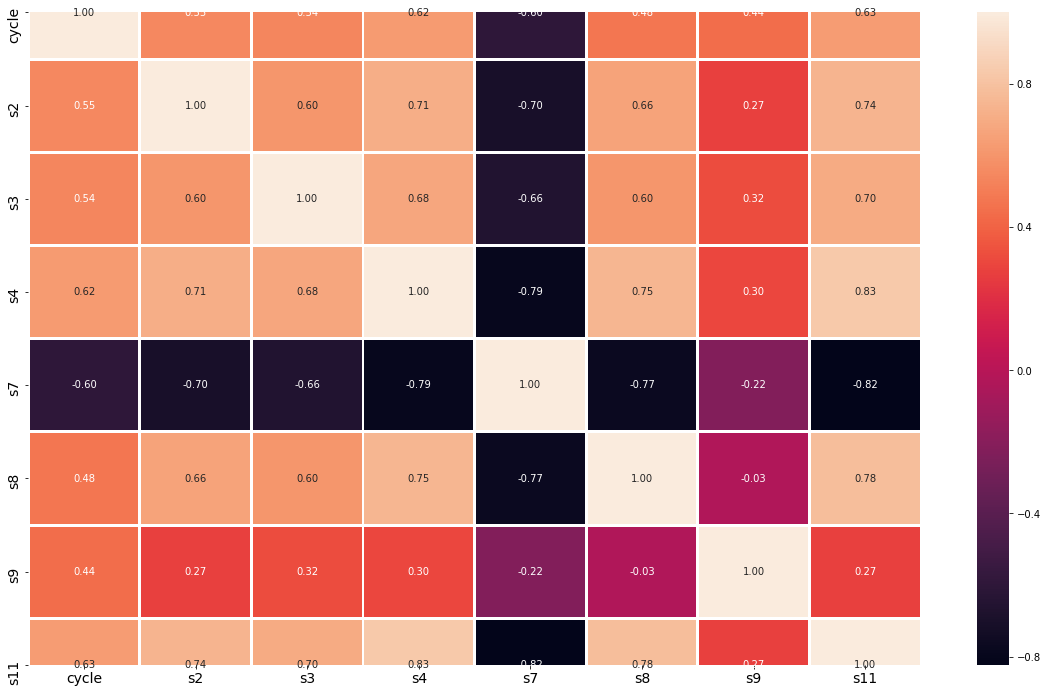

In [22]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corr.iloc[:8,:8], annot=True, fmt='0.2f', linewidths=2)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

s9 and s14 are highly correlated

In [0]:
df.drop('s14',1,inplace=True)

# Variance Inflation Factor (VIF)

In [28]:
vif = []
for c in df.columns[:-1]:
    X = df.drop(['ttf'] + [c], axis=1)
    y = df[c]
    X = sm.add_constant(X)
    est = sm.OLS(y, X).fit()
    r2 = est.rsquared
    vif.append((c, 1/(1-r2)))
vif

/home/sachin/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


[('cycle', 2.0986016743255362),
 ('s2', 2.6400168747410917),
 ('s3', 2.290827528412246),
 ('s4', 4.600447631794535),
 ('s7', 4.342938825098116),
 ('s8', 4.660282745811622),
 ('s9', 2.0517265713779893),
 ('s11', 6.030024090094846),
 ('s12', 5.292174200633403),
 ('s13', 4.650889797223802),
 ('s15', 3.303357931869847),
 ('s17', 2.5636304510585735),
 ('s20', 3.0701341837950715),
 ('s21', 3.1165443846550454)]

# Baseline Model

In [0]:
import statsmodels.api as sm

In [30]:
X = df.drop('ttf', 1)
y = df['ttf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16504, 14), (4127, 14), (16504,), (4127,))

In [31]:
X = sm.add_constant(X_train)
est = sm.OLS(y_train, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ttf   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     2256.
Date:                Tue, 29 Oct 2019   Prob (F-statistic):               0.00
Time:                        22:38:21   Log-Likelihood:                -84505.
No. Observations:               16504   AIC:                         1.690e+05
Df Residuals:                   16489   BIC:                         1.692e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.284e+04    2.8e+04      3.314      0.001    3.79e+04    1.48e+05
cycle         -0.3992      0.007    -59.940      0.000      -0.412      -0.386
s2            -4.9159      1.024     -4.800      0.000      -6.923      -2.908
s3            -0.2736      0.078     -3.516      0.000      -0.426      -0.121
s4            -0.5143      0.075     -6.826      0.000      -0.662      -0.367
s7             4.1375      0.743      5.566      0.000       2.681       5.594
s8           -25.5362      9.531     -2.679      0.007     -44.218      -6.854
s9            -0.2709      0.020    -13.278      0.000      -0.311      -0.231
s11          -25.1596      2.893     -8.696      0.000     -30.831     -19.488
s12            6.2215      0.986      6.309      0.000       4.288       8.155
s13          -12.1597      9.372     -1.297      0.195     -30.530       6.211
s15          -83.8652     15.283     -5.488      0.000    -113.821     -53.909
s17           -0.9387      0.325     -2.887      0.004      -1.576      -0.301
s20            8.4417      3.058      2.761      0.006       2.448      14.435
s21           22.5216      5.151      4.372      0.000      12.425      32.618
==============================================================================
Omnibus:                     2467.293   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4121.351
Skew:                           1.004   Prob(JB):                         0.00
Kurtosis:                       4.400   Cond. No.                     8.85e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.85e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Residual Plots

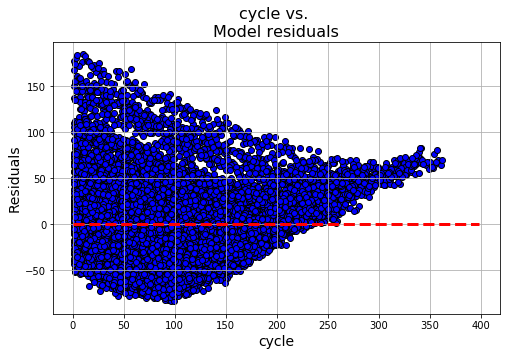

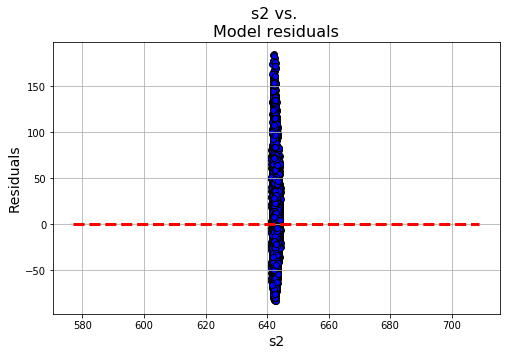

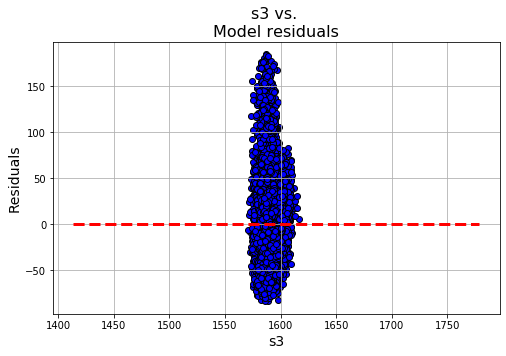

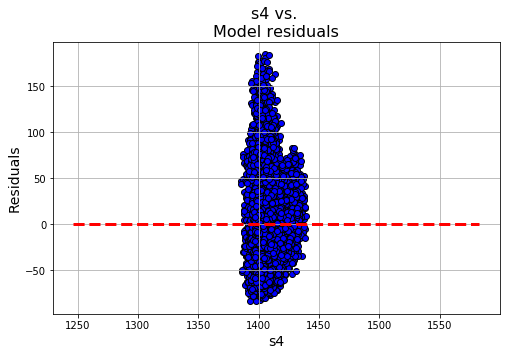

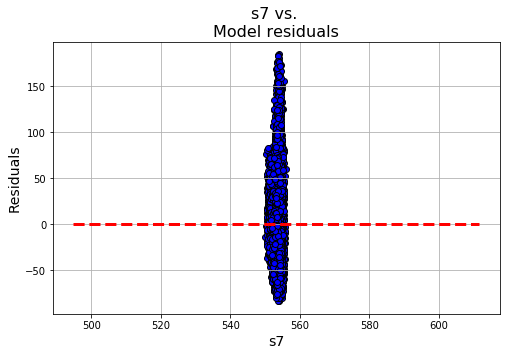

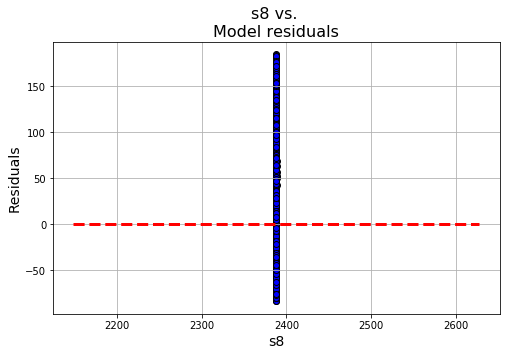

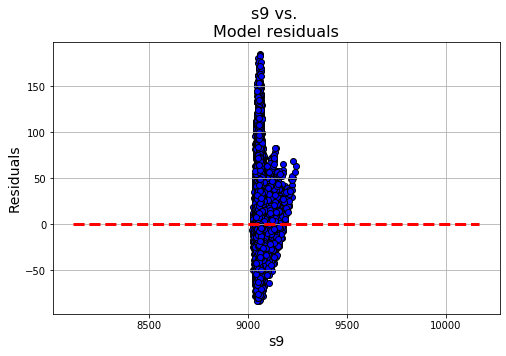

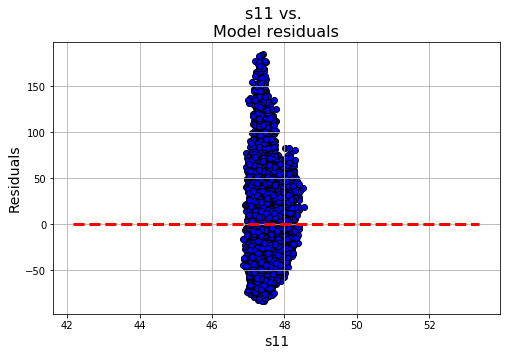

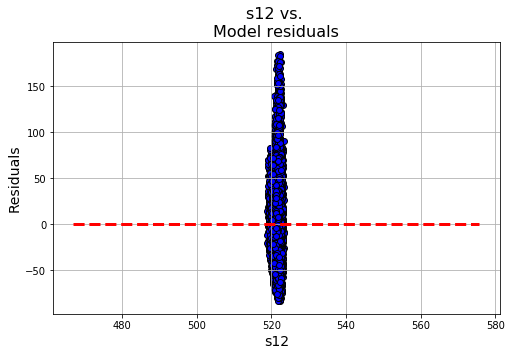

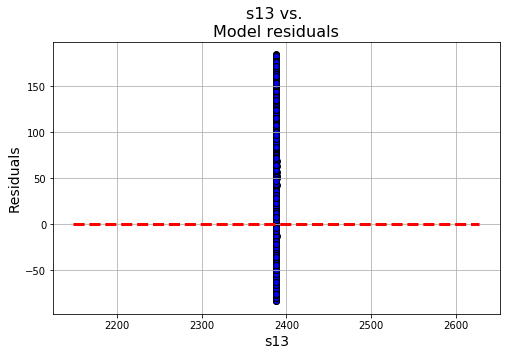

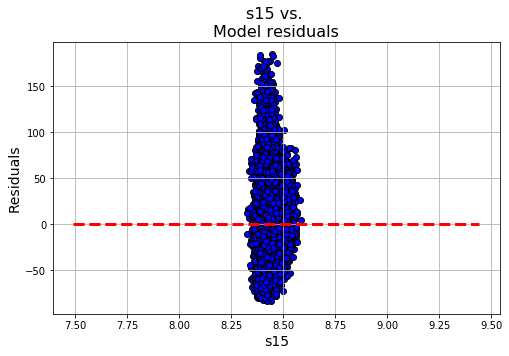

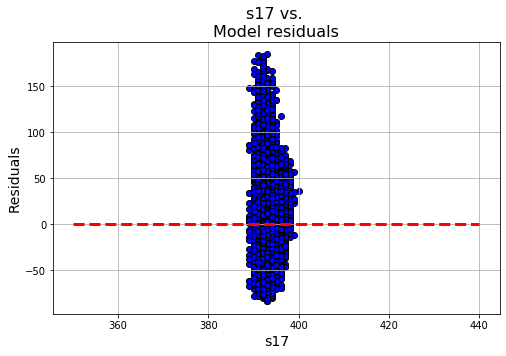

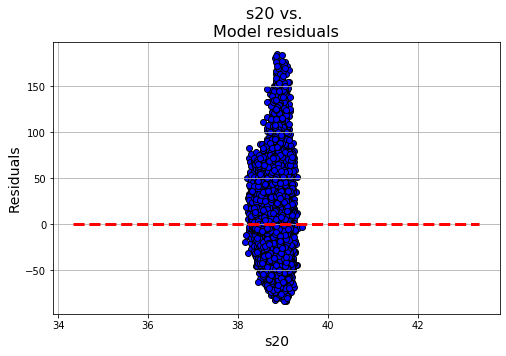

In [32]:
for c in X_train.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nModel residuals".format(c),fontsize=16)
    plt.scatter(x=X_train[c],y=est.resid,color='blue',edgecolor='k')
    plt.grid(True)
    xmin=min(X_train[c])
    xmax = max(X_train[c])
    plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Residuals',fontsize=14)
    plt.show()

# Fitted Vs Residuals

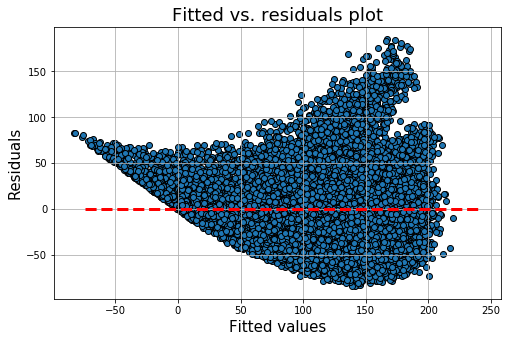

In [33]:
plt.figure(figsize=(8,5))
p= plt.scatter(x=est.fittedvalues,y=est.resid,edgecolor='k')
xmin = min(est.fittedvalues)
xmax = max(est.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

# Histogram of Residuals

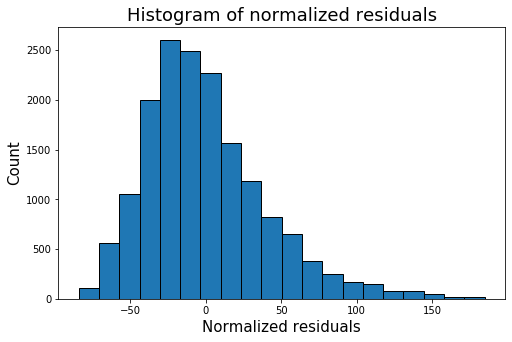

In [34]:
plt.figure(figsize=(8,5))
plt.hist(est.resid,bins=20,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

# QQ Plot

In [0]:
from statsmodels.graphics.gofplots import qqplot

<Figure size 576x360 with 0 Axes>

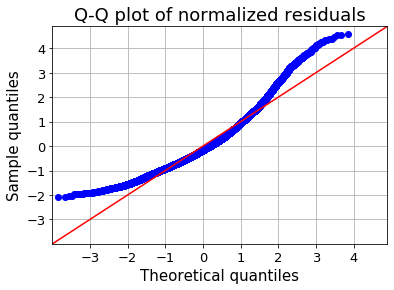

In [36]:
plt.figure(figsize=(8,5))
fig = qqplot(est.resid,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

# Shapiro-Wilk Test

In [0]:
from scipy.stats import shapiro

In [38]:
s,p = shapiro(est.resid)
s,p

/home/sachin/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9467411637306213, 0.0)

# Cook's Distance

In [0]:
from statsmodels.stats.outliers_influence import OLSInfluence
inf = OLSInfluence(est)

In [40]:
threshold = 4/(len(df))
(c, p) = inf.cooks_distance
outliers = pd.Series(c).sort_values(ascending=False)
outliers = outliers[outliers > threshold]
outliers

timestamp
2019-01-04 12:20:30    0.004210
2019-01-04 07:07:30    0.004141
2019-01-01 15:56:30    0.003074
2019-01-04 12:20:00    0.001922
2019-01-07 10:18:00    0.001732
                         ...   
2019-01-07 21:37:00    0.000194
2019-01-04 20:04:30    0.000194
2019-01-04 20:21:30    0.000194
2019-01-03 15:13:30    0.000194
2019-01-07 19:13:30    0.000194
Length: 1085, dtype: float64

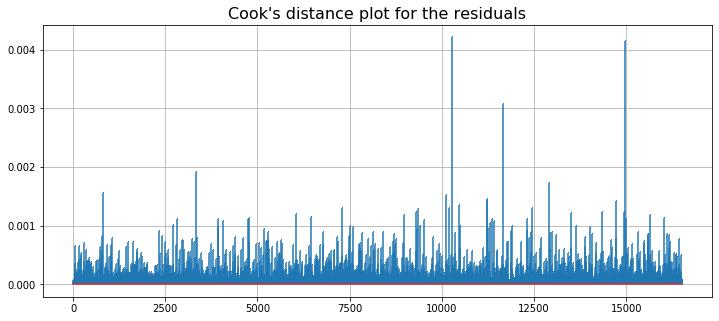

In [41]:
plt.figure(figsize=(12,5))
plt.title("Cook's distance plot for the residuals",fontsize=16)
plt.stem(np.arange(len(c)), c, markerfmt=",", use_line_collection=True)
plt.grid(True)
plt.show()

In [42]:
df_without_outliers = df.drop(index=outliers.index)
df_without_outliers

,cycle,s2,s3,s4,s7,s8,s9,s11,s12,s13,s15,s17,s20,s21,ttf
timestamp,,,,,,,,,,,,,,,
2019-01-01 00:00:00,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
2019-01-01 00:00:30,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2019-01-01 00:01:00,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
2019-01-01 00:01:30,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
2019-01-01 00:02:00,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-08 03:53:00,196,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,4
2019-01-08 03:53:30,197,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,3
2019-01-08 03:54:00,198,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,2


# Model Without Outliers

In [0]:
import statsmodels.api as sm

In [44]:
X = df_without_outliers.drop('ttf', 1)
y = df_without_outliers['ttf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15636, 14), (3910, 14), (15636,), (3910,))

In [45]:
X_train_constant = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train_constant).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ttf   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     2768.
Date:                Tue, 29 Oct 2019   Prob (F-statistic):               0.00
Time:                        22:38:29   Log-Likelihood:                -77204.
No. Observations:               15636   AIC:                         1.544e+05
Df Residuals:                   15621   BIC:                         1.546e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.568e+05   2.53e+04      6.196      0.000    1.07e+05    2.06e+05
cycle         -0.3775      0.006    -64.757      0.000      -0.389      -0.366
s2            -4.9616      0.882     -5.628      0.000      -6.690      -3.234
s3            -0.2821      0.067     -4.200      0.000      -0.414      -0.150
s4            -0.4401      0.065     -6.803      0.000      -0.567      -0.313
s7             3.8813      0.639      6.073      0.000       2.629       5.134
s8           -29.2327      8.385     -3.486      0.000     -45.668     -12.797
s9            -0.2992      0.018    -16.394      0.000      -0.335      -0.263
s11          -21.8839      2.495     -8.772      0.000     -26.774     -16.994
s12            5.2818      0.848      6.228      0.000       3.620       6.944
s13          -34.9946      8.239     -4.248      0.000     -51.143     -18.846
s15          -75.0050     13.194     -5.685      0.000    -100.867     -49.143
s17           -0.7674      0.281     -2.728      0.006      -1.319      -0.216
s20            8.9429      2.633      3.396      0.001       3.782      14.104
s21           20.2106      4.419      4.574      0.000      11.549      28.872
==============================================================================
Omnibus:                     1421.892   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2036.742
Skew:                           0.725   Prob(JB):                         0.00
Kurtosis:                       4.011   Cond. No.                     9.34e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.34e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Random Forest Regression

In [0]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [47]:
regressor = RandomForestRegressor(max_depth=6,n_estimators = 100, random_state = 0, n_jobs=-1)  
regressor.fit(X_train, y_train) 
pickle.dump(regressor, open(f'{pickle_path}/random_forest_regression.pickle', 'wb'))
regressor.score(X_test, y_test)

0.7657383776789977

In [48]:
gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(5,7),
            'n_estimators': (50, 100),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=100,n_jobs=-1)
    
grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_
print('Best Params',best_params)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
Pickling array (shape=(14,), dtype=object).
Pickling array (shape=(15636,), dtype=datetime64[ns]).
Pickling array (shape=(2, 15636), dtype=int64).
Memmapping (shape=(12, 15636), dtype=float64) to new file /dev/shm/joblib_memmapping_folder_11750_3353218861/11750-139643177078624-35c014a5e00d46ed81a3a6f0ee1f4ee9.pkl
Pickling array (shape=(2,), dtype=object).
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(12,), dtype=int64).
Pickling array (shape=(15636,), dtype=datetime64[ns]).
Pickling array (shape=(15636,), dtype=int64).
Pickling array (shape=(15636,), dtype=datetime64[ns]).
Pickling array (shape=(12508,), dtype=int64).
Pickling array (shape=(3128,), dtype=int64).
Pickling array (shape=(14,), dtype=object).
Pickling array (shape=(15636,), dtype=datetime64[ns]).
Pickling array (shape=(2, 15636), dtype=int64).
Memmapping (shape=(12, 15

In [72]:
rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=False, verbose=False)
rfr.fit(X_train, y_train)
pickle.dump(regressor, open(f'{pickle_path}/random_forest_regression_cv.pickle', 'wb'))
rfr.score(X_test, y_test)

0.8663308438963854

# PCA

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [0]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [75]:
pca = PCA(0.9)
pca.fit(X_train_scaled)
pca_data = pca.transform(X_train_scaled)
pca.explained_variance_ratio_

array([0.67153583, 0.09434907, 0.03084089, 0.02914912, 0.02655568,
       0.0243215 , 0.02212194, 0.02081317])

In [76]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=2)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
per_var

array([67.15,  9.43,  3.08,  2.91,  2.66,  2.43,  2.21,  2.08])

In [77]:
pca_explained_variance_ratio_total = {}
temp_labels = []
variance_pc = 0
for i,l in enumerate(labels):
  temp_labels.append(l)
  variance_pc += per_var[i]
  pca_explained_variance_ratio_total[','.join(temp_labels)] = variance_pc
pca_explained_variance_ratio_total

{'PC1': 67.15,
 'PC1,PC2': 76.58000000000001,
 'PC1,PC2,PC3': 79.66000000000001,
 'PC1,PC2,PC3,PC4': 82.57000000000001,
 'PC1,PC2,PC3,PC4,PC5': 85.23,
 'PC1,PC2,PC3,PC4,PC5,PC6': 87.66000000000001,
 'PC1,PC2,PC3,PC4,PC5,PC6,PC7': 89.87,
 'PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8': 91.95}

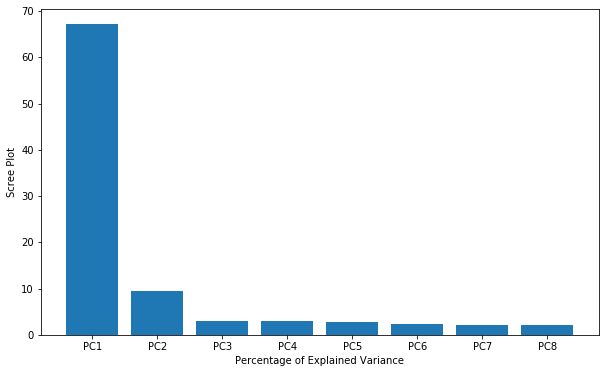

In [78]:
plt.figure(figsize=(10,6))
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.xlabel('Percentage of Explained Variance')
plt.ylabel('Scree Plot')
plt.show()

In [79]:
loading_scores = pd.DataFrame(pca.components_, columns=X.columns, index=labels)
loading_scores

,cycle,s2,s3,s4,s7,s8,s9,s11,s12,s13,s15,s17,s20,s21
PC1,0.231176,0.266117,0.253435,0.293940,-0.291369,0.275151,0.094449,0.302225,-0.297647,0.274957,0.280011,0.262250,-0.275958,-0.276977
PC2,0.341602,0.015233,0.100067,0.011549,0.069378,-0.333075,0.790914,-0.024360,0.083385,-0.333410,0.027238,0.104043,-0.023136,-0.028660
PC3,0.705394,-0.050194,-0.677954,0.006948,-0.022049,0.044568,-0.162476,0.014975,-0.038595,0.050877,-0.015766,-0.070728,-0.041941,0.006833
PC4,0.501883,-0.308861,0.638763,-0.032547,0.005871,0.040918,-0.192375,-0.025899,-0.011031,0.041318,-0.116197,-0.421504,0.082122,0.067171
PC5,0.063300,-0.663929,0.058194,-0.021961,-0.038939,0.024506,-0.086880,-0.025513,0.016788,0.033295,0.003268,0.725466,0.098849,0.059441
PC6,0.243420,0.600789,0.180880,-0.105356,0.089298,-0.008814,-0.174053,-0.071363,0.046376,0.013775,-0.235581,0.409873,0.441290,0.268275
PC7,-0.017233,-0.055819,-0.057152,-0.004413,-0.023863,0.012629,0.033387,0.010937,-0.015407,0.017105,-0.032386,-0.067137,0.636885,-0.761334
PC8,-0.009531,-0.049535,-0.039985,0.067507,-0.027203,0.025212,0.053383,0.022282,-0.055149,0.018769,0.787325,-0.130148,0.456333,0.371652


In [80]:
loading_scores.loc['PC1'].sort_values(ascending=False)

s11      0.302225
s4       0.293940
s15      0.280011
s8       0.275151
s13      0.274957
s2       0.266117
s17      0.262250
s3       0.253435
cycle    0.231176
s9       0.094449
s20     -0.275958
s21     -0.276977
s7      -0.291369
s12     -0.297647
Name: PC1, dtype: float64

In [81]:
pca_df = pd.DataFrame(pca_data, columns=labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,7.813665,-1.998281,0.315841,-0.825661,0.356640,0.330408,0.402428,0.010454
1,2.346245,0.527052,0.526289,0.648835,-0.698416,0.364564,0.101051,0.577608
2,-4.900919,-0.001560,-0.157159,0.458963,-0.306014,-0.906157,0.428868,0.249561
3,1.380556,-0.836787,0.344418,0.309601,0.405847,-0.003494,-0.422553,-0.188055
4,-1.339450,-1.298254,0.125845,-0.561994,-0.277936,-0.627310,1.262879,-0.301138
...,...,...,...,...,...,...,...,...
15560,0.131427,-0.230334,0.042091,-0.666507,0.342371,-0.285402,-0.723454,-0.146430
15561,3.466562,-1.674488,0.743992,0.217850,-0.172431,0.156790,-1.368760,0.291246
15562,-2.528122,-1.145901,-0.061429,-1.236886,-0.698175,-0.037224,-0.135914,0.462133
15563,-4.373071,-0.040418,-0.700320,0.403345,0.474515,0.421834,0.932269,-0.064756


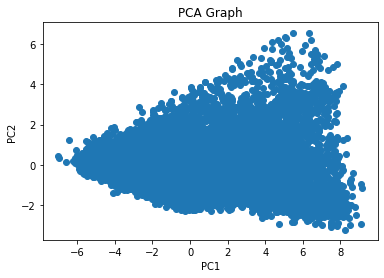

In [82]:
plt.scatter(x=pca_df.PC1, y=pca_df.PC2)
plt.title('PCA Graph')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [83]:
pca = PCA(0.9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
regressor = RandomForestRegressor(n_estimators = 100, max_depth=6, random_state = 0, n_jobs=-1, verbose=False)  
regressor.fit(X_train, y_train) 
pickle.dump(regressor, open('Predictive maintenance pickles/random_forest_with_pca.pickle', 'wb'))
regressor.score(X_test, y_test)

0.8661470654130952

# Feature Engineering

In [0]:
def backward_elimination(df, y, confidence = 0.025):
  features_selected = list(df.columns)
  for _ in df.columns:
    X = df[features_selected]
    X = sm.add_constant(X)
    est = sm.OLS(y, X).fit()
    p_values_series = est.pvalues[1:]
    p_values = list(zip(p_values_series.index,p_values_series))
    p_values = sorted(p_values, key=lambda x: x[1], reverse=True) # Descending Order
    if p_values[0][1] < confidence:
      break
    else:
      features_selected.remove(p_values[0][0])
  return features_selected

In [89]:
features_backward = backward_elimination(X,y, confidence=0.025)
features_backward

['cycle',
 's2',
 's3',
 's4',
 's7',
 's8',
 's9',
 's11',
 's12',
 's13',
 's15',
 's17',
 's20',
 's21']

In [90]:
X_train_selected = X_train[features_backward]
X_test_selected = X_test[features_backward]

regressor = RandomForestRegressor(n_estimators = 100, max_depth=6, random_state = 0, n_jobs=-1, verbose=False)  
regressor.fit(X_train_selected, y_train) 
pickle.dump(regressor, open('Predictive maintenance pickles/random_forest_with_pca.pickle', 'wb'))
regressor.score(X_test_selected, y_test)

0.8661470654130952

# Log of Dependent Variable

In [91]:
df_no_zeros = df_without_outliers.copy()
df_no_zeros = df_no_zeros[df_no_zeros['ttf']>0]
X = df_no_zeros.drop(['ttf'], 1)
y = df_no_zeros['ttf']
y = np.log(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15565, 14), (3892, 14), (15565,), (3892,))

In [92]:
regressor = RandomForestRegressor(n_estimators = 100, max_depth=6, random_state = 0, n_jobs=-1, verbose=False)  
regressor.fit(X_train, y_train) 
regressor.score(X_train, y_train)

0.8832732305702791

In [0]:
y_pred = regressor.predict(X_test)
residuals = y_test - y_pred

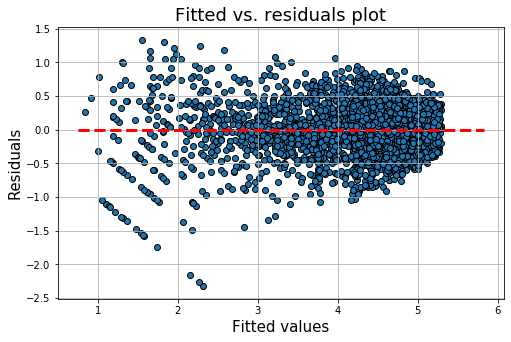

In [94]:
plt.figure(figsize=(8,5))
p= plt.scatter(x=y_pred,y=residuals,edgecolor='k')
xmin = min(y_pred)
xmax = max(y_pred)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

# Turn into Classification Problem

In [95]:
period = 30
df_without_outliers['label'] = df_without_outliers['ttf'].apply(lambda x: 1 if x <= period else 0)
df_without_outliers.head()

,cycle,s2,s3,s4,s7,s8,s9,s11,s12,s13,s15,s17,s20,s21,ttf,label
timestamp,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191,0
2019-01-01 00:00:30,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190,0
2019-01-01 00:01:00,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189,0
2019-01-01 00:01:30,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188,0
2019-01-01 00:02:00,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187,0


In [97]:
X = df_without_outliers.drop(['ttf', 'label'], 1)
y = df_without_outliers['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15636, 14), (3910, 14), (15636,), (3910,))

# Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
print('Accuracy: ',logisticRegr.score(X_test, y_test))

/home/sachin/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy:  0.9452685421994885


In [0]:
def print_model_stats(clf, X_test, y_test, threshold=0.5, prob_frequency=30, cost_matrix=None, cm=False):
  '''
  Params:
  clf --> Your fitted sklearn binary classifier
  X_test --> Test Features
  y_test --> Test Labels (Should only consist of 0's and 1's)
  threshold --> Prediction based on threshold (Default is 0.5)
  prob --> Frequency of probability annotations in ROC Curve
  cost-matrix -->  Numpy array should be of the format
  [
    [Cost_of_TP, Cost_of_FP],
    [Cost_of_FN, Cost_of_TN]
  ]
  cm --> Print Confusion Matrix and return it in the form tp,fp,fn,tn
  '''
  if cost_matrix is None:
    y_predict = (clf.predict_proba(X_test)[:,1] >= threshold).astype(int)
  elif cost_matrix.shape != (2,2):
    raise Exception('Invalid Cost Matrix Shape')
  else:
    cost_tp = cost_matrix[0][0]
    cost_fp = cost_matrix[0][1]
    cost_fn = cost_matrix[1][0]
    cost_tn = cost_matrix[1][1]
    probs = clf.predict_proba(X_test)[:,1]
    cost_true = (probs*cost_tp) + (1 - probs)*cost_fp
    cost_false = (probs*cost_fn) + (1 - probs)*cost_tn
    y_predict = (cost_true < cost_false).astype(int)
  tp = tn = fn = fp = 0
  for i, y in enumerate(y_test):
    if y==1:
      if y_predict[i] == 1: # Predicted 1 and Actual 1 --> TP
        tp += 1
      elif y_predict[i] == 0: # Predicted 0 and Actual 1 --> FN
        fn += 1
    elif y==0:
      if y_predict[i] == 0: # Predicted 0 and Actual 0 -->  TN
        tn += 1
      elif y_predict[i] == 1: # Predicted  and Actual 0 --> FP
        fp += 1
  print('Sensitivity (TPR): ',  tp / (tp + fn))
  print('Specificity (TNR): ',  tn / (tn + fp))
  print('Miss Rate (FNR): ',  fn / (tp + fn))
  print('Fall-Out (FPR): ',  fp / (tn + fp))
  print('\nAccuracy: ',  (tp + tn) / (tp + fn + tn + fp))
  print('Precision: ',  tp / (tp + fp))
  print('Kappa Score: ', cohen_kappa_score(y_test,y_predict))

  print('FP/FN Ratio: ', fp/fn)
  logit_roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
  fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
  plt.figure(figsize=(10,6))
  plt.plot(fpr, tpr, label='(AUC = %0.2f)' % logit_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  for i in range(len(thresholds)):
    if i%prob_frequency==0:
        plt.text(fpr[i], tpr[i], f'{thresholds[i]: .2f}')   
  plt.show()
  if cm:
    cm = confusion_matrix(y_test, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt='g'); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix') 
    ax.xaxis.set_ticklabels(['-ve', '+ve'])
    ax.yaxis.set_ticklabels(['-ve', '+ve'])
    plt.show()
    return tp,fp,fn,tn

Sensitivity (TPR):  0.7796610169491526
Specificity (TNR):  0.9746987951807229
Miss Rate (FNR):  0.22033898305084745
Fall-Out (FPR):  0.02530120481927711

Accuracy:  0.9452685421994885
Precision:  0.8455882352941176
Kappa Score:  0.779341881108222
FP/FN Ratio:  0.6461538461538462


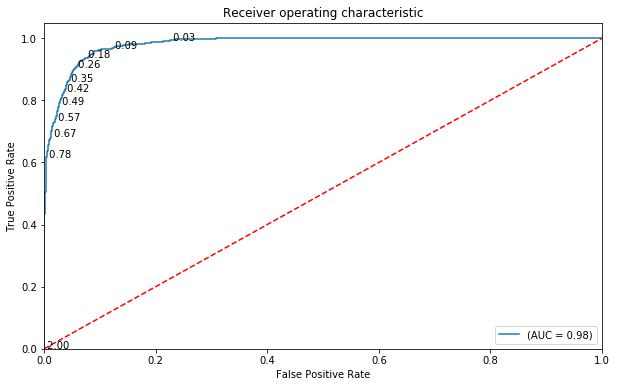

In [106]:
print_model_stats(logisticRegr, X_test, y_test)

# Random Forest Classifier

/home/sachin/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Sensitivity (TPR):  0.9220563847429519
Specificity (TNR):  0.9498034472331418
Miss Rate (FNR):  0.0779436152570481
Fall-Out (FPR):  0.05019655276685818

Accuracy:  0.9455242966751918
Precision:  0.7700831024930748
Kappa Score:  0.8067687884366144
FP/FN Ratio:  3.5319148936170213


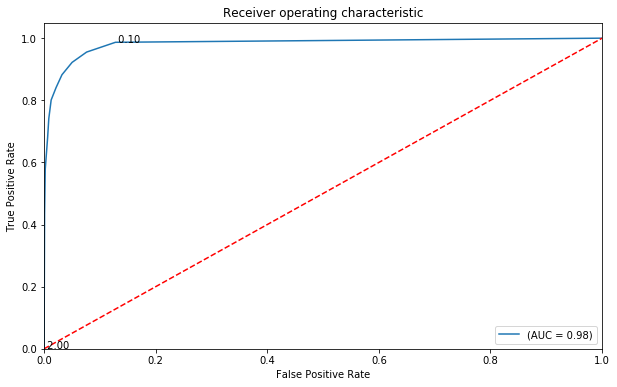

In [108]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
X = df_without_outliers.drop(['ttf', 'label'], 1)
y = df_without_outliers['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
pickle.dump(clf, open('Predictive maintenance pickles/random_forest_classification.pickle', 'wb'))
y_predict = clf.predict(X_test)
print_model_stats(clf, X_test,y_test, threshold=0.3, prob_frequency=10)